[Problem Overview](https://www.kaggle.com/competitions/vector-borne-disease-classification-challenge)

In [1]:
# !kaggle competitions download -c vector-borne-disease-classification-challenge

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [4]:
df.tail(5)

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
702,702,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Plague
703,703,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malaria
704,704,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
705,705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Plague
706,706,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Tungiasis


In [3]:
df['prognosis_encoded'], unique_categories = pd.factorize(df['prognosis'])
print(unique_categories, len(unique_categories))
df['prognosis_encoded'].value_counts()

Index(['Lyme_disease', 'Tungiasis', 'Zika', 'Rift_Valley_fever',
       'West_Nile_fever', 'Malaria', 'Chikungunya', 'Plague', 'Dengue',
       'Yellow_Fever', 'Japanese_encephalitis'],
      dtype='object') 11


prognosis_encoded
4     85
10    81
1     70
3     70
6     66
8     63
9     61
2     58
7     53
0     52
5     48
Name: count, dtype: int64

In [4]:
X = df.drop(columns=['id', 'prognosis'])
y = df['prognosis_encoded']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
X_dev_np = X_dev.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()
y_dev_np = y_dev.to_numpy()

print(f"Train set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set: X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"Dev set: X_dev: {X_dev.shape}, y_dev: {y_dev.shape}")

Train set: X_train: (494, 65), y_train: (494,)
Test set: X_test: (106, 65), y_test: (106,)
Dev set: X_dev: (107, 65), y_dev: (107,)


In [5]:
model = Sequential([
    Dense(65, activation='relu', input_shape=(X_train_np.shape[1],)),
    Dense(30, activation='relu'),
    Dense(len(unique_categories), activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

C:\Users\Ajay\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 65)             │         4,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           341 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,611 (25.82 KB)

 Trainable params: 6,611 (25.82 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X_train_np, y_train_np, 
                    validation_data=(X_dev_np, y_dev_np), 
                    epochs=10, 
                    batch_size=8)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.6542 - val_loss: 1.7954
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.6542 - val_loss: 1.8066
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.6542 - val_loss: 1.8016
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.6542 - val_loss: 1.8117
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.6542 - val_loss: 1.8035
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.7300e-04 - val_accuracy: 0.6636 - val_loss: 1.8666
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.6636 - val_loss: 1.8877
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.7514e-04 - val_accuracy: 0.6542 - v

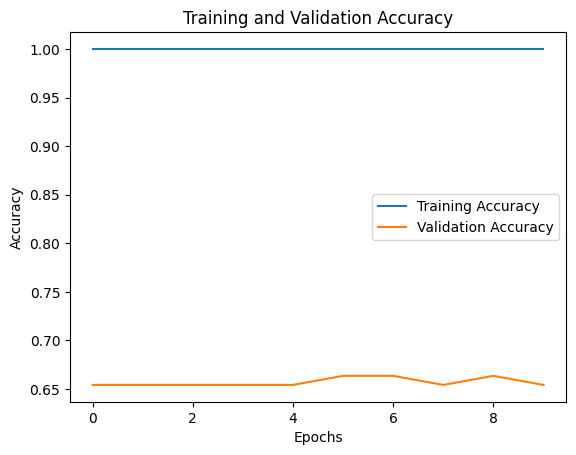

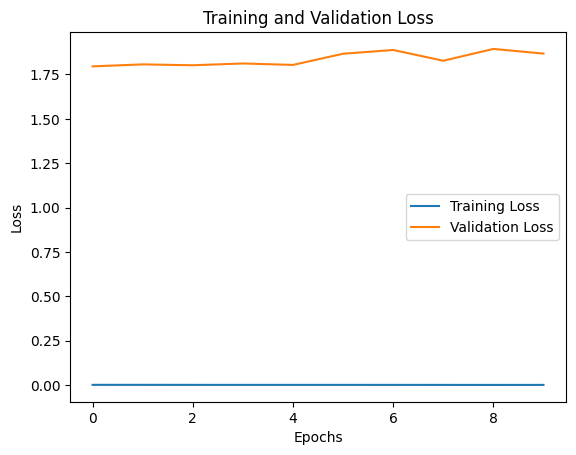

In [11]:

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Test Loss: 1.8214911222457886
Test Accuracy: 0.6792452931404114


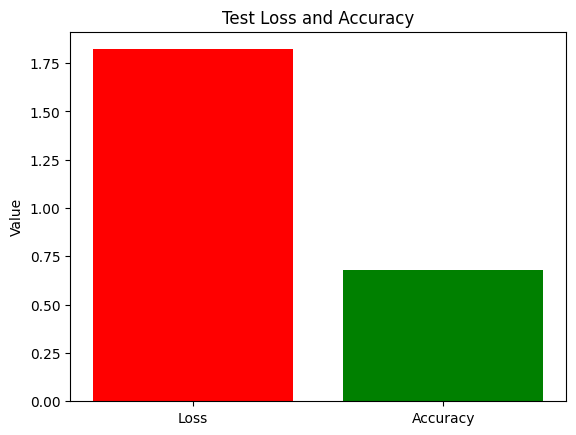

In [12]:

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_np, y_test_np, verbose=0)

# Print the test accuracy and loss
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot the test accuracy and loss
plt.bar(['Loss', 'Accuracy'], [test_loss, test_accuracy], color=['red', 'green'])
plt.title('Test Loss and Accuracy')
plt.ylabel('Value')
plt.show()

In [11]:
model.save('vector_borne_disease_model.h5')